# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

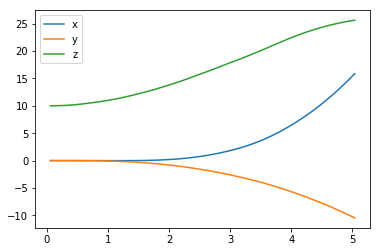

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

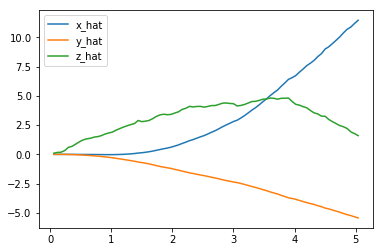

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

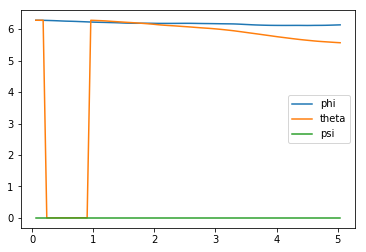

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

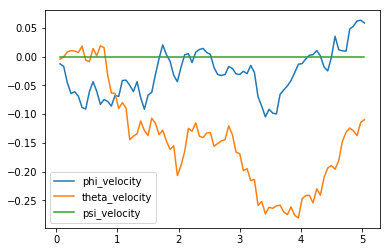

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

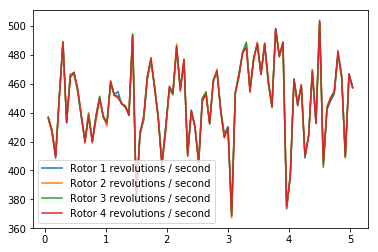

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 15.8579016  -10.45649741  25.60181034   6.13650879   5.56808891
   0.        ]
[11.45581463 -5.42717133  1.60002763]
[ 0.0587733  -0.10969937  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   1.451 (best =   1.460), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [330]:
## TODO: Train your agent here.
from agents.agent import DDPG
from task import Task
import numpy as np
import sys

# Take off task 
# Setting the initial values
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities

# Setting up the Task 
num_episodes = 500
target_pos = np.array([0., 0., 50.])
task = Task(init_pose=init_pose, init_velocities=init_velocities, 
            init_angle_velocities=init_angle_velocities, 
            runtime=runtime, target_pos=target_pos)
agent = DDPG(task) 

# Setting up the results
l = ['episode', 'reward']
res_reward = {x : [] for x in l}
best = 0

for n_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    t_reward = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        t_reward += reward
        
        # Keep best score
        if t_reward > best:
            best = t_reward
            
        if done:
            print("\rEpisode = {:4d}, Total_Reward = {:7.3f} (Best_Reward = {:7.3f})".format(
               n_episode, t_reward, best), end="")
            break
    res_reward['episode'].append(n_episode)
    res_reward['reward'].append(t_reward)
    sys.stdout.flush()


Episode =  500, Total_Reward = 567.203 (Best_Reward = 567.250)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

Text(0.5,0,'Episodes')

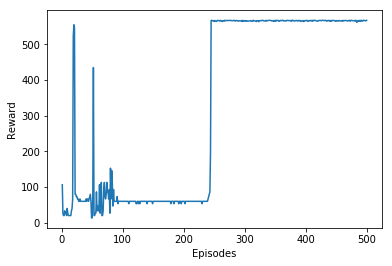

In [331]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(res_reward['episode'], res_reward['reward'], label='Reward Curve')
plt.ylabel('Reward')
plt.xlabel('Episodes')

## Check Performance

I will run 1 simulation to see how it is performing the task. I will also plot the trayectory.  

Episode Reward : 1105.745646460751


Text(0.5,0,'Z axis')

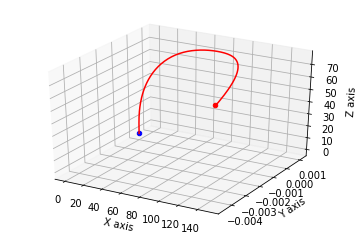

In [332]:
import numpy as np
import pandas as pd
from task import Task
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 

# Setting the initial values
runtime = 10000.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
target_pos = np.array([0., 0., 50.])
task = Task(init_pose=init_pose, init_velocities=init_velocities, 
            init_angle_velocities=init_angle_velocities, runtime=runtime, target_pos=target_pos)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
state = agent.reset_episode() # start a new episode
t_reward = 0
with open(file_output, 'w') as csvfile:
    while True:
        rotor_speeds = agent.act(state)
        next_state, reward, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        state = next_state
        t_reward += reward
        
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        if done:
            print("Episode Reward : {}".format(t_reward))
            break

# Looking at the trayectory in 3D
res = pd.DataFrame.from_dict(results)
t_ini = res['time'].idxmin() # Starting point Blue
t_final = res['time'].idxmax() # Ending point Red
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(res.x, res.y, res.z, c='r', marker='o')
ax.scatter(res.loc[t_ini, 'x'], res.loc[t_ini, 'y'], res.loc[t_ini, 'z'], c='b', marker='o')
ax.scatter(res.loc[t_final, 'x'], res.loc[t_final, 'y'], res.loc[t_final, 'z'], c='r', marker='o')
ax.plot(results['x'], results['y'], results['z'], c='r')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

I decided to do the take off task after reading extensively the student hub. My idea was to be able to teach at least 2 tasks starting from the one that seem the most easiest. But still, just taking off it took much. I follows much of the code that was already given. 

Most of my energy and focus was centered on the reward function. After reading others experience, the student hub, and reading the recommeded literature I found that by far the most important aspect of this work was designing correctly the reward function. I've experimented many ideas such as:

    - Manually changing the given reward function by trying different hyperparameters:
    
    reward = 1.-.3*(abs(self.sim.pose[:3] - self.target_pos)).sum())
    
    - Generating a new function that is bounded between 0 and 1 that was in function of the eucledian distance between the quadcopter's position and the target. I use the exponential function and tried many hyperparameter tuning with no good results. The Quadcopter didn't learn:
    
    np.exp(-dist/(dist+100))
    
    - I've also included in the function other types of parameters such as the velocity, experimenting with different exponential functions in the 3 axis. No luck yet. 
    
    - Thanks to a video recommended in the students hub [1], I understood in improving the reward function by shaping it as a smooth gradient that was in line with its parameters. So I change the exponential to the hyperbolic tangent function, which was also recommended. 
    
    - The resulting reward was in function of the euclidean distance transformed by a tangent function which had only two hyper parameters:
    
      reward = 1-np.tanh(dist/100)

[Writing Great Reward Functions - Bonsai](https://www.youtube.com/watch?v=0R3PnJEisqk)

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

    - I used Deep Deterministic Policy Gradients (DDPG) algorithm given in the introduction of the proyect. From 
    what I research and tested, the initial configuration of hyperparameters and layers prove to be enough for most of the proyect. 
    
    - Although my main effords went into the reward function, I did some tuning with no significant results as in comparison with the reward function. I decided to keep the same initial hyperparameters.
    
    - I used the same network arquitecture as given. I only increased the units of the layer because it apparently show a decrease in training time if I doubled the units of each layer.


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

    - At first I thought that the take off task would be very easy so I had the ambition of starting with taking of an later teaching it a simple route. But the whole process of finding the right reward task was very hard. Since training was not fast, it also meant that more complex task would take a substancial time, which I didn't have. So in the end I had to balance between complexity of the task and training time. So it was a hard proyect. 
    
    - For me RL is still an uncharted territory, there is so many things that I still don't completly get. So I focused on what I believe was the most significant aspect of the work (reward function) and had the most influencial impact on the task. The aha moment came when I needed to provide a smooth learning function (tanh), which has the right slope so as to allow the quadcopter to learn within a decent traning time. 
    
    - The performance achieved after 1 simulation was: Episode Reward = 1105.76, which was aceptable. I plotted the trayectory in 3D and the task was completly achieved, it reach the height expected (z = 50)

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

    - There where to main frustration points, the first was starting the proyect. I literally looked at it for a whole day trying to understand what I had to do and what was the task. I went back to the videos, searched in the internet, and read the students hub. That's when I realized I was not alone in this problem, so eventually I just starting coding and testing basic ideas. The second wall was comming up with the reward function as described above, eventually it became the center of my effords because I saw that it shaped all of the quadcopter behaviour.     
    
    - For me its was really necessary to visualize somehow the quadcopter, and the recommended plots above where not so helpful. The 3D plot motivated me to understand more what was happening and why it didn't learn (Most of the time it took of and crash landed somewhere nearby). 